# Training VQA Models with BP Mitigation Strategies: Visualization
*Training QNN treated with methods 0-3 of the BP mitigation strategy (Cancer / MNIST)*<br/>
*Compatible with Qiskit V1.02+*

### Authors
- **Thanh Nguyen**, nnct2000[at]gmail.com<br/>
    School of IT, SEBE, Deakin University, Melbourne, Vic, Australia
- **Jacob Cybulski**, jacob.cybulski[at]deakin.edu.au<br/>
    School of IT, SEBE, Deakin University, Melbourne, Vic, Australia

### Date
- Jul 2022: Prepared for Tim's Hons thesis
- Feb 2023: Reimplemented for the paper by Jacob L. Cybulski and Thanh Nguyen (2023): "Impact of Barren Plateaus Countermeasures on the Quantum Neural Network Capacity to Learn." *Quantum Information Processing*, 22, 442.
- May 2024: Compatibility upgrade to Qiskit 1.02

### References
- Gopal Ramesh Dahale (2024): ILearnQuantum - [Visualizing Barren Plateaus, GitHub](https://github.com/Gopal-Dahale/ILearnQuantum/blob/main/layerwise_learning_with_qiskit_and_pytorch/barren_plateaus_visualization.ipynb)

In [1]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import os
import time

seed = 42
np.random.seed(seed)

In [2]:
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector
import torch
from torch import nn
import pandas as pd

from sklearn.decomposition import PCA

from Components.train import train, train_batch
from Components.data import cancer_data, fetch_mnist, fetch_mnist_balanced
from Components.circuits import *
from Components.gradients import *
from Components.log_ops import *
from Components.utils import *

In [3]:
# X_train, X_val, y_train, y_val = cancer_data(PCA_n = FEATURE_DIM)
# X_train, X_val, y_train, y_val = fetch_mnist(PCA_n = FEATURE_DIM, data_size=DATA_SIZE)
X_train, X_val, y_train, y_val = fetch_mnist_balanced(PCA_n = FEATURE_DIM, data_size=DATA_SIZE)
# X_train, X_val, y_train, y_val = iris(pd=False, PCA_n=None)

X_train_t = torch.from_numpy(X_train).to(torch.float32)
y_train_t = torch.from_numpy(y_train).to(torch.float32)
X_val_t = torch.from_numpy(X_val).to(torch.float32)
y_val_t = torch.from_numpy(y_val).to(torch.float32)

Training set: 70 samples
Testing set: 30 samples
Number of features: 4
Classes:[0 1]; Encoded as: [-1  1]
Training labels 1 ("1"): 35, -1 ("0"): 35
Test labels 1 ("1"): 15, -1 ("0"): 15


In [4]:
surface0 = pd.read_csv(f'{LOG_PATH}/m0/LossFunctionSurface.csv', index_col=0)
surface0 = surface0.transpose().reset_index(drop=True).transpose()

sel_inst = 0
path0 = pd.read_csv(f'{LOG_PATH}/m0/m0-{sel_inst}-Weights.csv', index_col=0)
path0[path0.shape[1]] = pd.read_csv(f'{LOG_PATH}/m0/m0-{sel_inst}-LossFunction.csv', index_col=0)
path0 = path0.transpose().reset_index(drop=True).transpose()

paths0 = []
for p in range(10):
    if os.path.exists(f'{LOG_PATH}/m0/m0-{p}-LossFunction.csv'):
        path = pd.read_csv(f'{LOG_PATH}/m0/m0-{p}-Weights.csv', index_col=0)
        path[path.shape[1]] = pd.read_csv(f'{LOG_PATH}/m0/m0-{p}-LossFunction.csv', index_col=0)
        path = path.transpose().reset_index(drop=True).transpose()
        paths0.append(path)

# surface1 = pd.read_csv(f'{LOG_PATH}/m1/LossFunctionSurface.csv', index_col=0)
# path1 = pd.read_csv(f'{LOG_PATH}/m1/m1-1-Weights.csv', index_col=0)
# path1[path1.shape[1]] = pd.read_csv(f'{LOG_PATH}/m1/m1-1-LossFunction.csv', index_col=0)
# surface1 = surface1.transpose().reset_index(drop=True).transpose()
# path1 = path1.transpose().reset_index(drop=True).transpose()

# surface2 = pd.read_csv(f'{LOG_PATH}/m2/LossFunctionSurface.csv', index_col=0)
# path2 = pd.read_csv(f'{LOG_PATH}/m2/m2-0-Weights.csv', index_col=0)
# path2[path2.shape[1]] = pd.read_csv(f'{LOG_PATH}/m2/m2-0-LossFunction.csv', index_col=0)
# surface2 = surface2.transpose().reset_index(drop=True).transpose()
# path2 = path2.transpose().reset_index(drop=True).transpose()

# surface3 = pd.read_csv(f'{LOG_PATH}/m3/LossFunctionSurface.csv', index_col=0)
# path3 = pd.read_csv(f'{LOG_PATH}/m3/m3-3-Weights.csv', index_col=0)
# path3[path3.shape[1]] = pd.read_csv(f'{LOG_PATH}/m3/m3-3-LossFunction.csv', index_col=0)
# surface3 = surface3.transpose().reset_index(drop=True).transpose()
# path3 = path3.transpose().reset_index(drop=True).transpose()

In [5]:
plt.close("all")

Found file: ./Logs-MNIST-100/m0/m0-0-LossFunction.csv


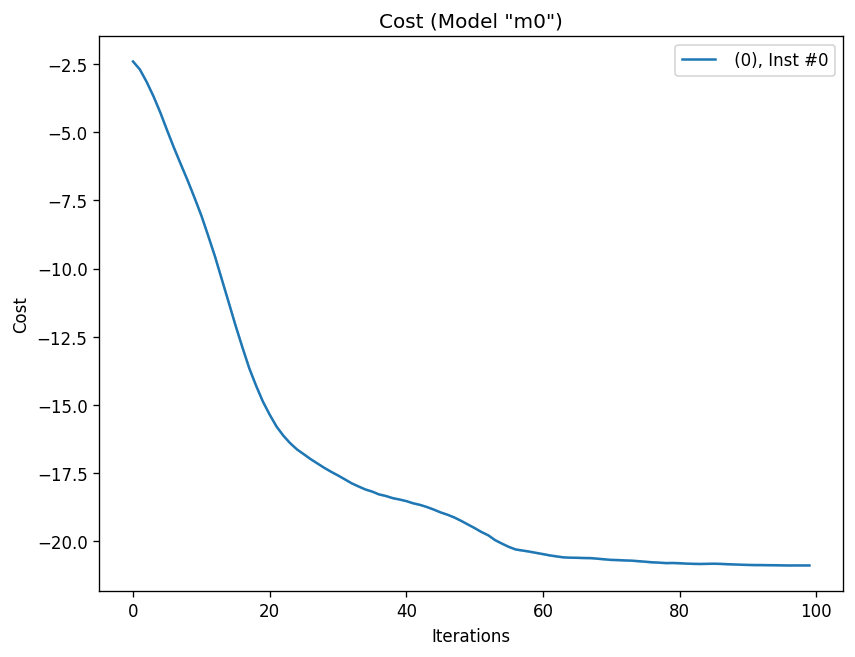

In [6]:
import os
%matplotlib inline
losses = []
labels = []
m = 'm0'
for s in range(10):
    if os.path.exists(f'{LOG_PATH}/{m}/{m}-{s}-LossFunction.csv'):
        print(f'Found file: {LOG_PATH}/{m}/{m}-{s}-LossFunction.csv')
        score_loss = pd.read_csv(f'{LOG_PATH}/{m}/{m}-{s}-LossFunction.csv', index_col=0)
        score_loss = score_loss.transpose().reset_index(drop=True)
        losses.append(score_loss)
        labels.append(f'Inst #{s}')
plot_many_series(losses, smooth_weight=0.8, dpi=120, figsize=(8, 6),
                 xlabel='Iterations', ylabel='Cost', title=f'Cost (Model "{m}")', label='',
                 d=labels, pref='')

Found file: ./Logs-MNIST-100/m0/m0-0-Scores-Train.csv



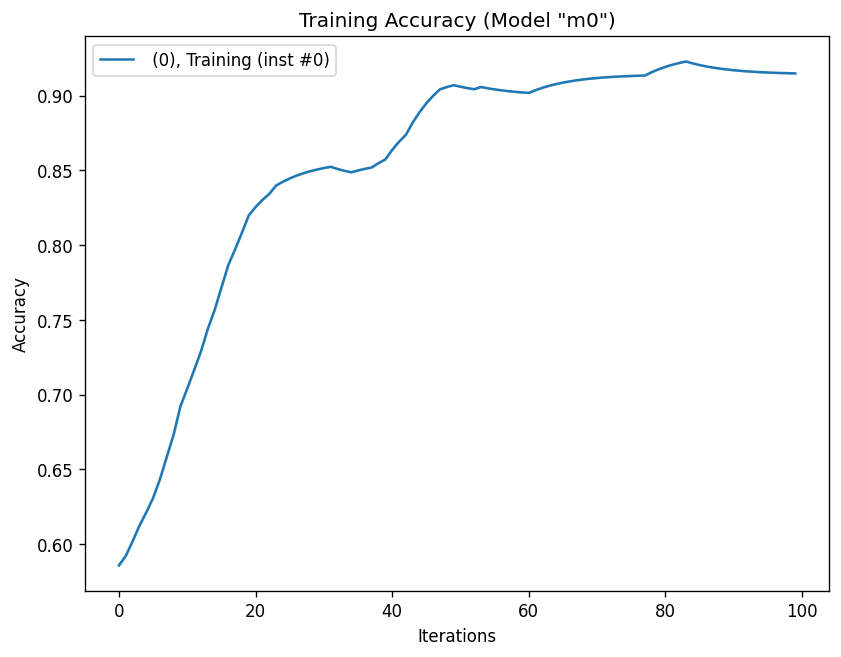

In [7]:
import os
%matplotlib inline
scores = []
labels = []
m = 'm0'
for s in range(10):
    if os.path.exists(f'{LOG_PATH}/{m}/{m}-{s}-Scores-Train.csv'):
        print(f'Found file: {LOG_PATH}/{m}/{m}-{s}-Scores-Train.csv')
        score_train = pd.read_csv(f'{LOG_PATH}/{m}/{m}-{s}-Scores-Train.csv', index_col=0)
        score_train = score_train.transpose().reset_index(drop=True)
        scores.append(score_train)
        labels.append(f'Training (inst #{s})')
print()
plot_many_series(scores, smooth_weight=0.85, dpi=120, figsize=(8, 6),
                 xlabel='Iterations', ylabel='Accuracy', title=f'Training Accuracy (Model "{m}")', label='',
                 d=labels, pref='')

Found file: ./Logs-MNIST-100/m0/m0-0-Scores-Test.csv



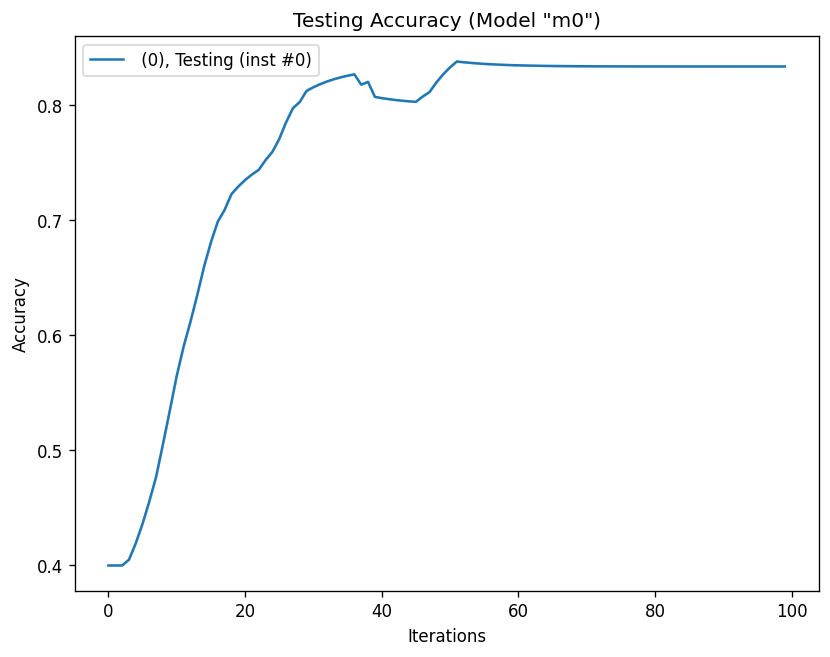

In [7]:
import os
%matplotlib inline
scores = []
labels = []
m = 'm0'
for s in range(10):
    if os.path.exists(f'{LOG_PATH}/{m}/{m}-{s}-Scores-Test.csv'):
        print(f'Found file: {LOG_PATH}/{m}/{m}-{s}-Scores-Test.csv')
        score_test = pd.read_csv(f'{LOG_PATH}/{m}/{m}-{s}-Scores-Test.csv', index_col=0)
        score_test = score_test.transpose().reset_index(drop=True)
        scores.append(score_test)
        labels.append(f'Testing (inst #{s})')
print()
plot_many_series(scores, smooth_weight=0.85, dpi=120, figsize=(8, 6),
                 xlabel='Iterations', ylabel='Accuracy', title=f'Testing Accuracy (Model "{m}")', label='',
                 d=labels, pref='')

Explained Variance Ratio: [0.13159621 0.10281973 0.09867237 0.09407121 0.09280871]
PCA done! Time elapsed: 0.009422540664672852 seconds


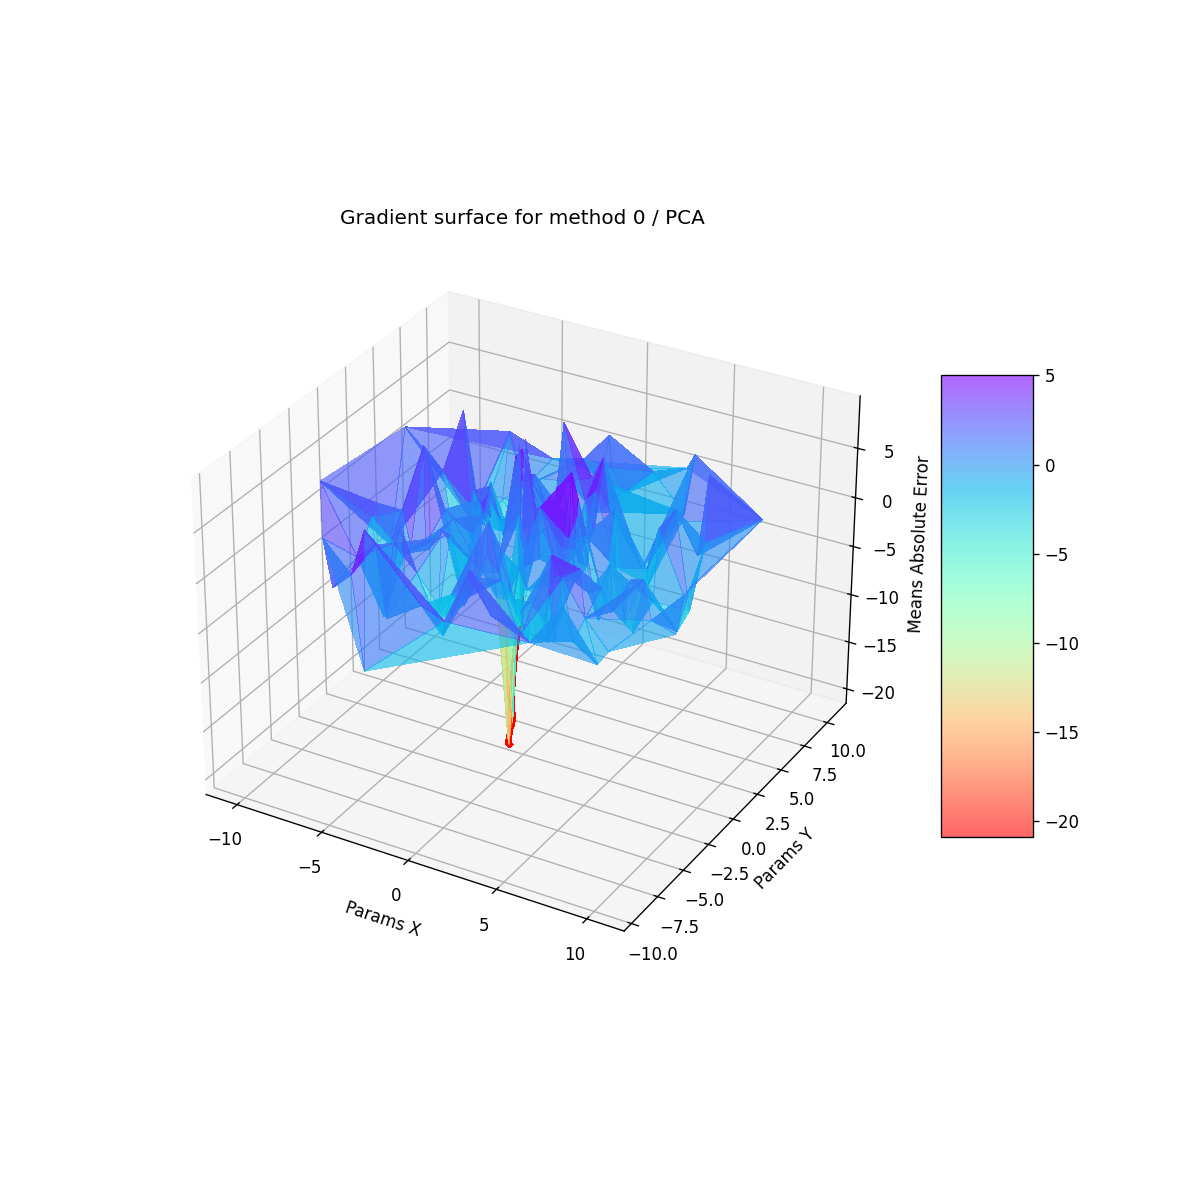

In [13]:
from sklearn.decomposition import PCA

def plotSurface(surface:pd.DataFrame, path=None, title = '', save:str = None, dpi = 80, pcs=(0, 1), pc_max=2, plot_path=True):
    '''
    use %matplotlib widget for interative plot!
    '''
    if path is not None:
        if type(path) == list:
            data = surface
            for d in range(len(path)):
                data = pd.concat([data, path[d]], ignore_index=True)
        else:
            data = pd.concat([surface, path], ignore_index=True)
    else:
        data = surface

    parameters = data.iloc[:,:-1]
    zValue = data.iloc[:,-1]

    time_start = time.time()

    pca = PCA(n_components=pc_max).fit(parameters)
    map_results = pca.transform(parameters)
    
    print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
    
    fig = plt.figure(figsize=(10, 10), dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel(f'Params X')
    ax.set_ylabel(f'Params Y')
    ax.set_zlabel('Means Absolute Error')
    ax.set_title(title)
    
    plot = ax.plot_trisurf(map_results[:,pcs[0]],
                           map_results[:,pcs[1]],
                           zValue,
                           cmap=plt.get_cmap('rainbow_r'),
                           linewidth=1,
                           antialiased=False,
                           alpha=0.6)

    if path is not None and plot_path:
        if type(path) == list:
            for d in range(len(path)):
                pathParameters = path[d].iloc[:,:-1]
                pathZvalue = path[d].iloc[:,-1]
        
                map_path_results = pca.transform(pathParameters)
        
                ax.plot3D(map_path_results[:,pcs[0]],
                          map_path_results[:,pcs[1]],
                          pathZvalue,
                          color='red',
                          linewidth=3,
                          antialiased=False,
                          alpha=1)
        else:
            pathParameters = path.iloc[:,:-1]
            pathZvalue = path.iloc[:,-1]
    
            map_path_results = pca.transform(pathParameters)
    
            ax.plot3D(map_path_results[:,pcs[0]],
                      map_path_results[:,pcs[1]],
                      pathZvalue,
                      color='red',
                      linewidth=3,
                      antialiased=False,
                      alpha=1)

    print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
    plt.colorbar(plot, shrink=0.5, aspect=5)
    plt.show()

    if save:
        plt.savefig(save)

%matplotlib widget
plotSurface(surface0, path=path0, title='Gradient surface for method 0 / PCA', dpi=120, save=f'{CHARTS_PATH}/m0_pca.png', pc_max=5, pcs=(1,2))

In [ ]:
plt.close("all")

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 4.954279
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.126812
[t-SNE] KL divergence after 300 iterations: 0.799840
t-SNE done! Time elapsed: 0.4579167366027832 seconds


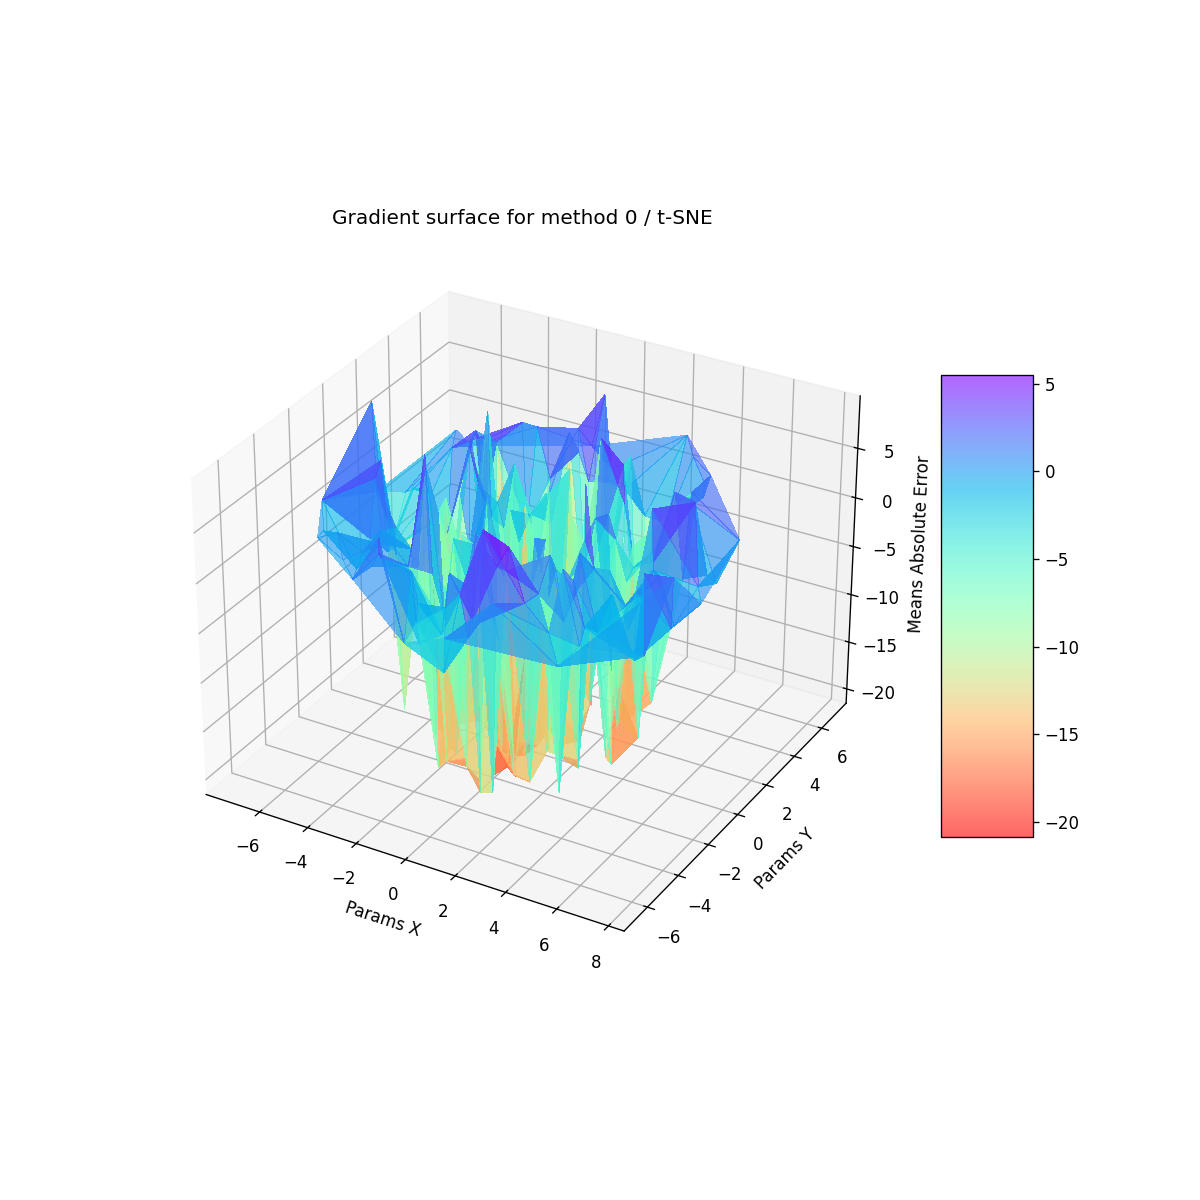

In [9]:
from sklearn.manifold import TSNE
%matplotlib widget

def plotTSNESurface(surface:pd.DataFrame, path=None, title = 'Gradient surface', 
                    save:str = None, dpi = 120, pcs=(0, 1), pc_max=3, plot_path=False,
                    method='barnes_hut'):

    if path is not None:
        if type(path) == list:
            data = surface
            for d in range(len(path)):
                data = pd.concat([data, path[d]], ignore_index=True)
        else:
            data = pd.concat([surface, path], ignore_index=True)
    else:
        data = surface

    parameters = data.iloc[:,:-1]
    zValue = data.iloc[:,-1]
    
    time_start = time.time()
    tsne = TSNE(n_components=pc_max, verbose=1, perplexity=100, n_iter=300, method=method)
    tsne_results = tsne.fit_transform(parameters)
    
    fig = plt.figure(figsize=(10, 10), dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel(f'Params X')
    ax.set_ylabel(f'Params Y')
    ax.set_zlabel('Means Absolute Error')
    ax.set_title(title)
    
    plot = ax.plot_trisurf(tsne_results[:,pcs[0]],
                           tsne_results[:,pcs[1]],
                           zValue,
                           cmap=plt.get_cmap('rainbow_r'),
                           linewidth=1,
                           antialiased=False,
                           alpha=0.6)

    # In TSNE you cannot add more data points
    if path is not None and plot_path:
        pathParameters = path.iloc[:,:-1]
        pathZvalue = path.iloc[:,-1]

        tsne_path_results = tsne.fit_transform(pathParameters)

        ax.plot3D(tsne_path_results[:,pcs[0]],
                  tsne_path_results[:,pcs[1]],
                  pathZvalue,
                  color='red',
                  linewidth=3,
                  antialiased=False,
                  alpha=1)

    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    
    plt.colorbar(plot, shrink=0.5, aspect=5)
    plt.show()

    if save:
        plt.savefig(save)

plotTSNESurface(surface0, path=paths0, title='Gradient surface for method 0 / t-SNE', dpi=120, save=f'{CHARTS_PATH}/m0_tsne_2000.png', 
                pcs=(1,3), pc_max=4, method='exact')

In [ ]:
plt.close("all")

Isomap done! Time elapsed: 0.06775546073913574 seconds


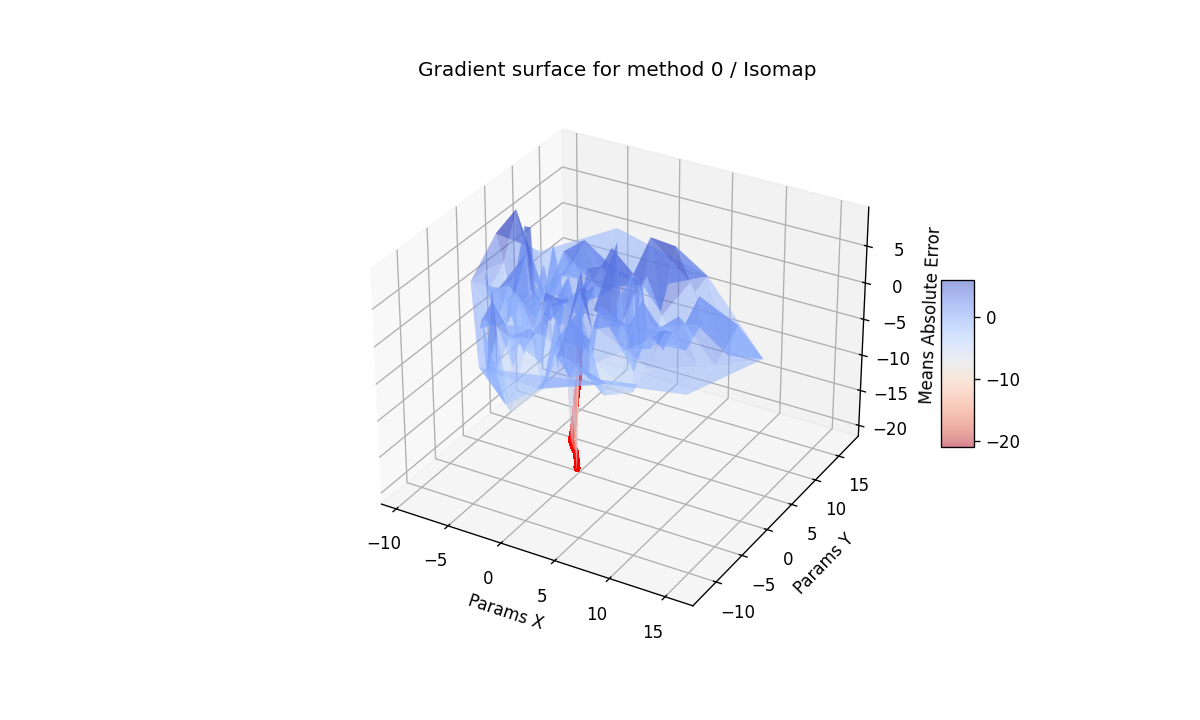

In [10]:
from sklearn.manifold import Isomap
import time
%matplotlib widget

def plotIsomapSurfTri(surface:pd.DataFrame, path=None, title = 'Gradient surface', 
                    save = None, dpi = 120, figsize=(10, 10), pcs=(0, 1), pc_max=3, plot_path=True,
                    metric='minkowski'):

    if path is not None:
        if type(path) == list:
            data = surface
            for d in range(len(path)):
                data = pd.concat([data, path[d]], ignore_index=True)
        else:
            data = pd.concat([surface, path], ignore_index=True)
    else:
        data = surface

    parameters = data.iloc[:,:-1]
    
    time_start = time.time()
    map = Isomap(n_components=pc_max, n_neighbors=100, metric=metric).fit(parameters)
    map_results = map.transform(parameters)
    X = map_results[:,pcs[0]]
    Y = map_results[:,pcs[1]]
    Z = data.iloc[:,-1]
    
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel(f'Params X')
    ax.set_ylabel(f'Params Y')
    ax.set_zlabel('Means Absolute Error')
    ax.set_title(title)
    
    plot = ax.plot_trisurf(X, Y, Z,
                           cmap=plt.get_cmap('coolwarm_r'),
                           linewidth=1,
                           antialiased=True,
                           alpha=0.5)

    if path is not None and plot_path:
        if type(path) == list:
            for d in range(len(path)):
                pathParameters = path[d].iloc[:,:-1]
                pathZvalue = path[d].iloc[:,-1]
        
                map_path_results = map.transform(pathParameters)
        
                ax.plot3D(map_path_results[:,pcs[0]],
                          map_path_results[:,pcs[1]],
                          pathZvalue,
                          color='red',
                          linewidth=3,
                          antialiased=False,
                          alpha=1)
        else:
            pathParameters = path.iloc[:,:-1]
            pathZvalue = path.iloc[:,-1]
    
            map_path_results = map.transform(pathParameters)
    
            ax.plot3D(map_path_results[:,pcs[0]],
                      map_path_results[:,pcs[1]],
                      pathZvalue,
                      color='red',
                      linewidth=3,
                      antialiased=False,
                      alpha=1)

    print('Isomap done! Time elapsed: {} seconds'.format(time.time()-time_start))

    plt.colorbar(plot, shrink=0.3, aspect=5)
    plt.show()

    if save:
        plt.savefig(save)

# Possible values for 'metric', default is 'minkowski'
metrics = {'haversine', 'precomputed', 'russellrao', 'euclidean', 'seuclidean', 'correlation', 'sokalsneath', 'l2', 'dice', 'wminkowski', 
           'chebyshev', 'minkowski', 'sqeuclidean', 'canberra', 'jaccard', 'yule', 'cityblock', 'nan_euclidean', 'sokalmichener', 
           'rogerstanimoto', 'braycurtis', 'hamming', 'l1', 'mahalanobis', 'cosine', 'manhattan'}
sel_paths = [paths0[0]] #, paths0[1], paths0[9]]
plotIsomapSurfTri(surface0, path=sel_paths, title='Gradient surface for method 0 / Isomap', metric='minkowski', # good: minkowski, cityblock, manhattan, chebyshev, euclidean, nan_euclidean, l1, l2
                  dpi=120, figsize=(10, 6), pcs=(1, 2), pc_max=4, save=f'{CHARTS_PATH}/m0_isomap_tri.png')

In [ ]:
plt.close("all")

Isomap done! Time elapsed: 0.3694767951965332 seconds


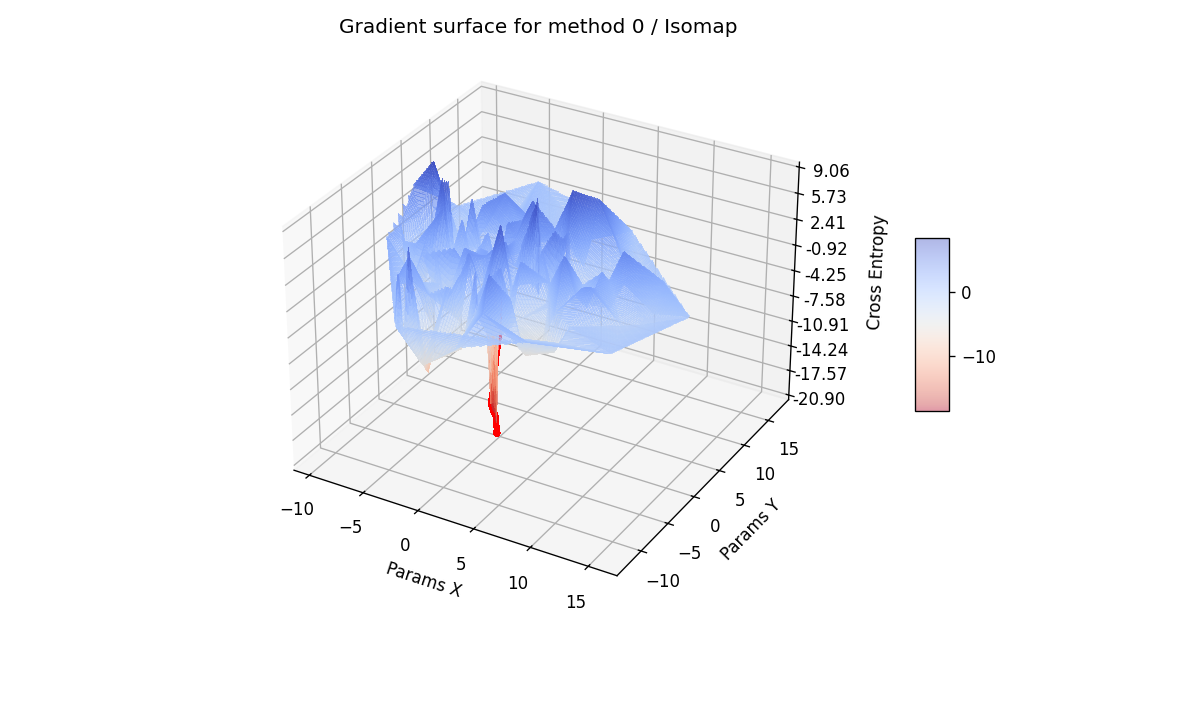

In [11]:
from sklearn.manifold import Isomap
import time
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata, RegularGridInterpolator

%matplotlib widget

def plotIsomap3DSurfPoly(surface:pd.DataFrame, path=None, pcs=(0, 1), pc_max=3, plot_path=True, 
                     title = 'Gradient surface', zlabel='Cross Entropy',
                     save=None, figsize=(10, 10), dpi = 120, cmap='jet_r',
                     metric='minkowski'):

    if path is not None:
        if type(path) == list:
            data = surface
            for d in range(len(path)):
                data = pd.concat([data, path[d]], ignore_index=True)
        else:
            data = pd.concat([surface, path], ignore_index=True)
    else:
        data = surface
    
    # data = surface
    parameters = data.iloc[:,:-1]

    time_start = time.time()

    ### Compress n-dim data to pc_max-dim
    map = Isomap(n_components=pc_max, n_neighbors=100, metric=metric).fit(parameters)
    map_results = map.transform(parameters)

    ### Prepare data for plotting
    X = map_results[:,pcs[0]]
    Y = map_results[:,pcs[1]]
    Z = data.iloc[:,-1]
    
    xi = np.linspace(min(X), max(X), X.shape[0])
    yi = np.linspace(min(Y), max(Y), Y.shape[0])
    x2, y2 = np.meshgrid(xi, yi)
    z2 = griddata((X, Y), Z, (x2, y2), method='linear', rescale=True) # method = 'cubic', 'nearest', 'linear'

    ### Plot all data
    my_col = cm.jet(Z/np.amax(Z))
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(x2, y2, z2, lightsource=None,
                           rstride=1, cstride=1, cmap=cmap, # cmap ='rainbow_r', 'seismic_r', 'bwr_r', 'coolwarm_r', 'RdBu'
                           linewidth=0, antialiased=False, alpha=0.4)

    if path is not None and plot_path:
        if type(path) == list:
            for d in range(len(path)):
                pathParameters = path[d].iloc[:,:-1]        
                map_path_results = map.transform(pathParameters)
                pathX = map_path_results[:,pcs[0]]
                pathY = map_path_results[:,pcs[1]]
                pathZ = path[d].iloc[:,-1]
        
                ax.plot3D(pathX, pathY, pathZ,
                          color='red',
                          linewidth=3,
                          antialiased=False,
                          alpha=1)
        else:
            pathParameters = path.iloc[:,:-1]
            map_path_results = map.transform(pathParameters)
            pathX = map_path_results[:,pcs[0]]
            pathY = map_path_results[:,pcs[1]]
            pathZ = path.iloc[:,-1]
    
            ax.plot3D(pathX, pathY, pathZ,
                      color='red',
                      linewidth=3,
                      antialiased=False,
                      alpha=1)

    # ax.plot([-15], [0], [-25], 'o', color='blue', alpha=1)
    print('Isomap done! Time elapsed: {} seconds'.format(time.time()-time_start))

    ax.set_xlabel(f'Params X')
    ax.set_ylabel(f'Params Y')
    ax.set_zlabel(zlabel)
    ax.zaxis.labelpad=10
    ax.set_title(title, pad=-1) # , y=1.0
    
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    fig.tight_layout()
    fig.subplots_adjust(left=-0.5)
    fig.subplots_adjust(bottom=0.15)
    fig.colorbar(surf, ax=ax, shrink=0.3, aspect=5) # location='bottom', orientation='horizontal', 

    plt.show()

    if save:
        plt.savefig(save)

# Possible values for 'metric', default is 'minkowski', good: minkowski, cityblock, manhattan, chebyshev, euclidean, nan_euclidean, l1, l2
metrics = {'haversine', 'precomputed', 'russellrao', 'euclidean', 'seuclidean', 'correlation', 'sokalsneath', 'l2', 'dice', 'wminkowski', 
           'chebyshev', 'minkowski', 'sqeuclidean', 'canberra', 'jaccard', 'yule', 'cityblock', 'nan_euclidean', 'sokalmichener', 
           'rogerstanimoto', 'braycurtis', 'hamming', 'l1', 'mahalanobis', 'cosine', 'manhattan'}
sel_paths = [paths0[0]] #, paths0[1], paths0[9]]
plotIsomap3DSurfPoly(surface0, path=path0, title='Gradient surface for method 0 / Isomap', metric='minkowski', 
                  dpi=120, figsize=(10, 6), cmap='coolwarm_r', pcs=(1, 2), pc_max=4, save=f'{CHARTS_PATH}/m0_isomap_rect.png')

In [ ]:
plt.close("all")

/home/jacob/miniconda3/envs/qiskit100/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/jacob/miniconda3/envs/qiskit100/lib/python3.11/site-packages/umap/umap_.py:576: RuntimeWarning: overflow encountered in cast
  knn_dists = knn_dists.astype(np.float32)
/home/jacob/miniconda3/envs/qiskit100/lib/python3.11/site-packages/umap/umap_.py:3039: RuntimeWarning: overflow encountered in cast
  dists = dists.astype(np.float32, order="C")


UMAP done! Time elapsed: 5.185530424118042 seconds


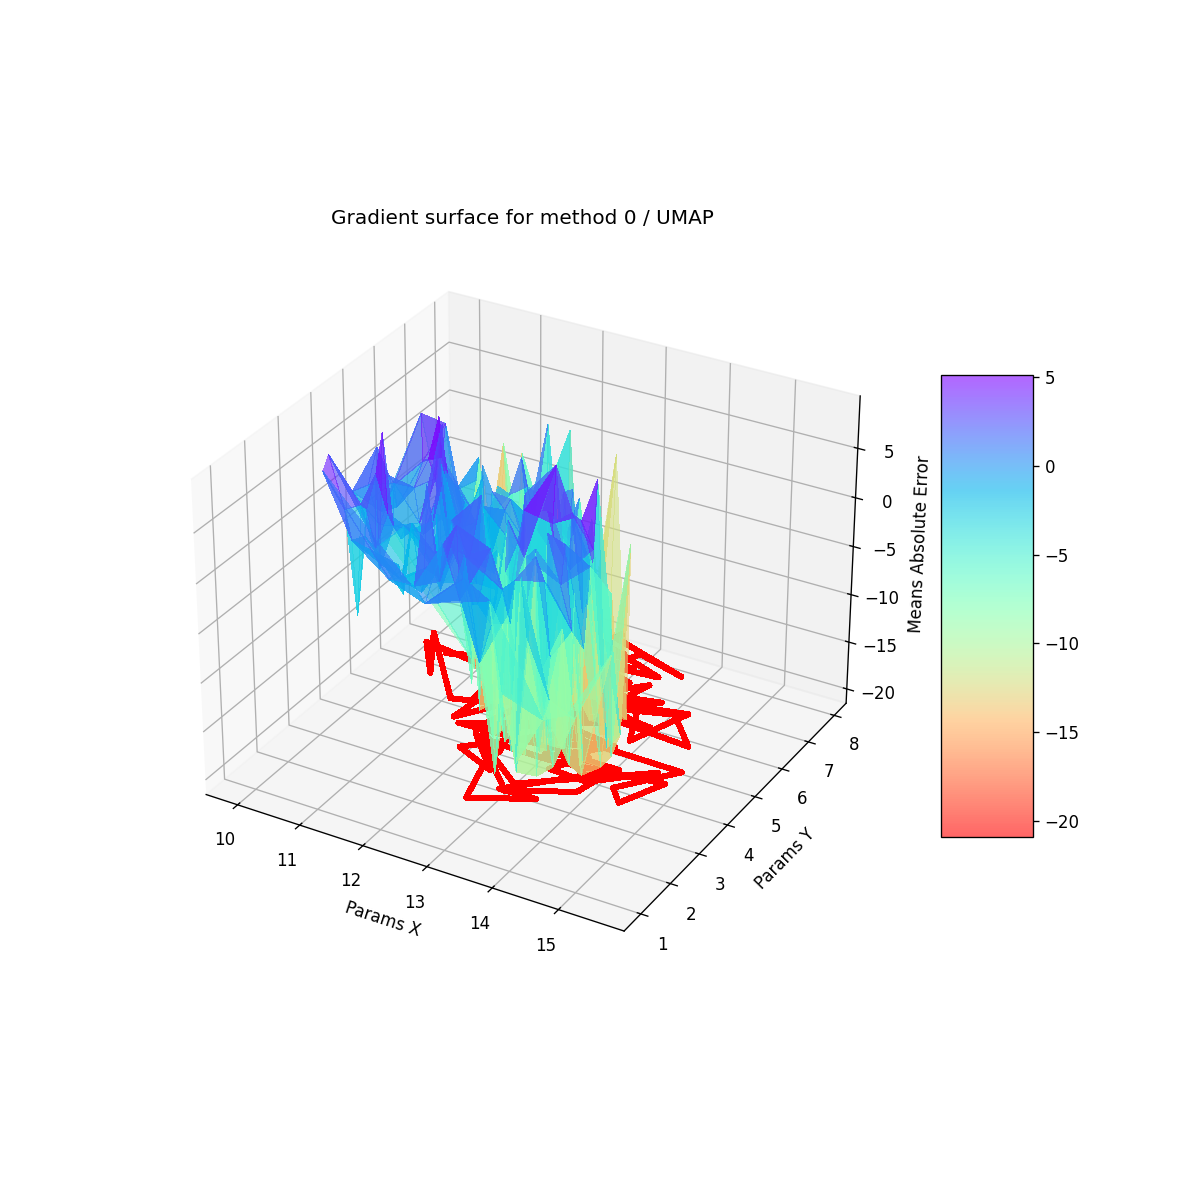

In [12]:
### Important note: to install use - pip install umap-learn
### Also: I am not very impressed with UMAP for this application

from umap import UMAP
%matplotlib widget

def plotUMAPSurface(surface:pd.DataFrame, path=None, title = 'Gradient surface', 
                    save:str = None, dpi = 80, pcs=(0, 1), pc_max=2, plot_path=False,
                    metric='cosine'):

    if path is not None:
        if type(path) == list:
            data = surface
            for d in range(len(path)):
                data = pd.concat([data, path[d]], ignore_index=True)
        else:
            data = pd.concat([surface, path], ignore_index=True)
    else:
        data = surface

    parameters = data.iloc[:,:-1]
    zValue = data.iloc[:,-1]
    
    time_start = time.time()
    umap_model = UMAP(n_components=pc_max, init='spectral', random_state=42, 
                      n_neighbors=40, min_dist=0.7, spread=3.0, repulsion_strength=0.5, learning_rate=0.5,
                      metric=metric, local_connectivity=0.05
                     ).fit(parameters)
    umap_results = umap_model.transform(parameters)
    
    fig = plt.figure(figsize=(10, 10), dpi=dpi)
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel(f'Params X')
    ax.set_ylabel(f'Params Y')
    ax.set_zlabel('Means Absolute Error')
    ax.set_title(title)
    
    plot = ax.plot_trisurf(umap_results[:,pcs[0]],
                           umap_results[:,pcs[1]],
                           zValue,
                           cmap=plt.get_cmap('rainbow_r'),
                           linewidth=1,
                           antialiased=False,
                           alpha=0.6)

    if path is not None and plot_path:
        if type(path) == list:
            for d in range(len(path)):
                pathParameters = path[d].iloc[:,:-1]
                pathZvalue = path[d].iloc[:,-1]
        
                umap_path_results = umap_model.transform(pathParameters)
        
                ax.plot3D(umap_path_results[:,pcs[0]],
                          umap_path_results[:,pcs[1]],
                          pathZvalue,
                          color='red',
                          linewidth=3,
                          antialiased=False,
                          alpha=1)
        else:
            pathParameters = path.iloc[:,:-1]
            pathZvalue = path.iloc[:,-1]
    
            umap_path_results = umap_model.transform(pathParameters)
    
            ax.plot3D(umap_path_results[:,pcs[0]],
                      umap_path_results[:,pcs[1]],
                      pathZvalue,
                      color='red',
                      linewidth=3,
                      antialiased=False,
                      alpha=1)

    print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))
    
    plt.colorbar(plot, shrink=0.5, aspect=5)
    plt.show()

    if save:
        plt.savefig(save)

# Possible values for 'metric', default is 'minkowski', good: minkowski, cityblock, manhattan, chebyshev, euclidean, nan_euclidean, l1, l2
plotUMAPSurface(surface0, path=path0, title='Gradient surface for method 0 / UMAP', dpi=120, plot_path=True, save=f'{CHARTS_PATH}/m0_umap.png', 
                pcs=(3, 4), pc_max=5, metric='mahalanobis')

Explained Variance Ratio: [0.13159621 0.10281973 0.09867237 0.09407121 0.09280871]
PCA done! Time elapsed: 0.010033607482910156 seconds


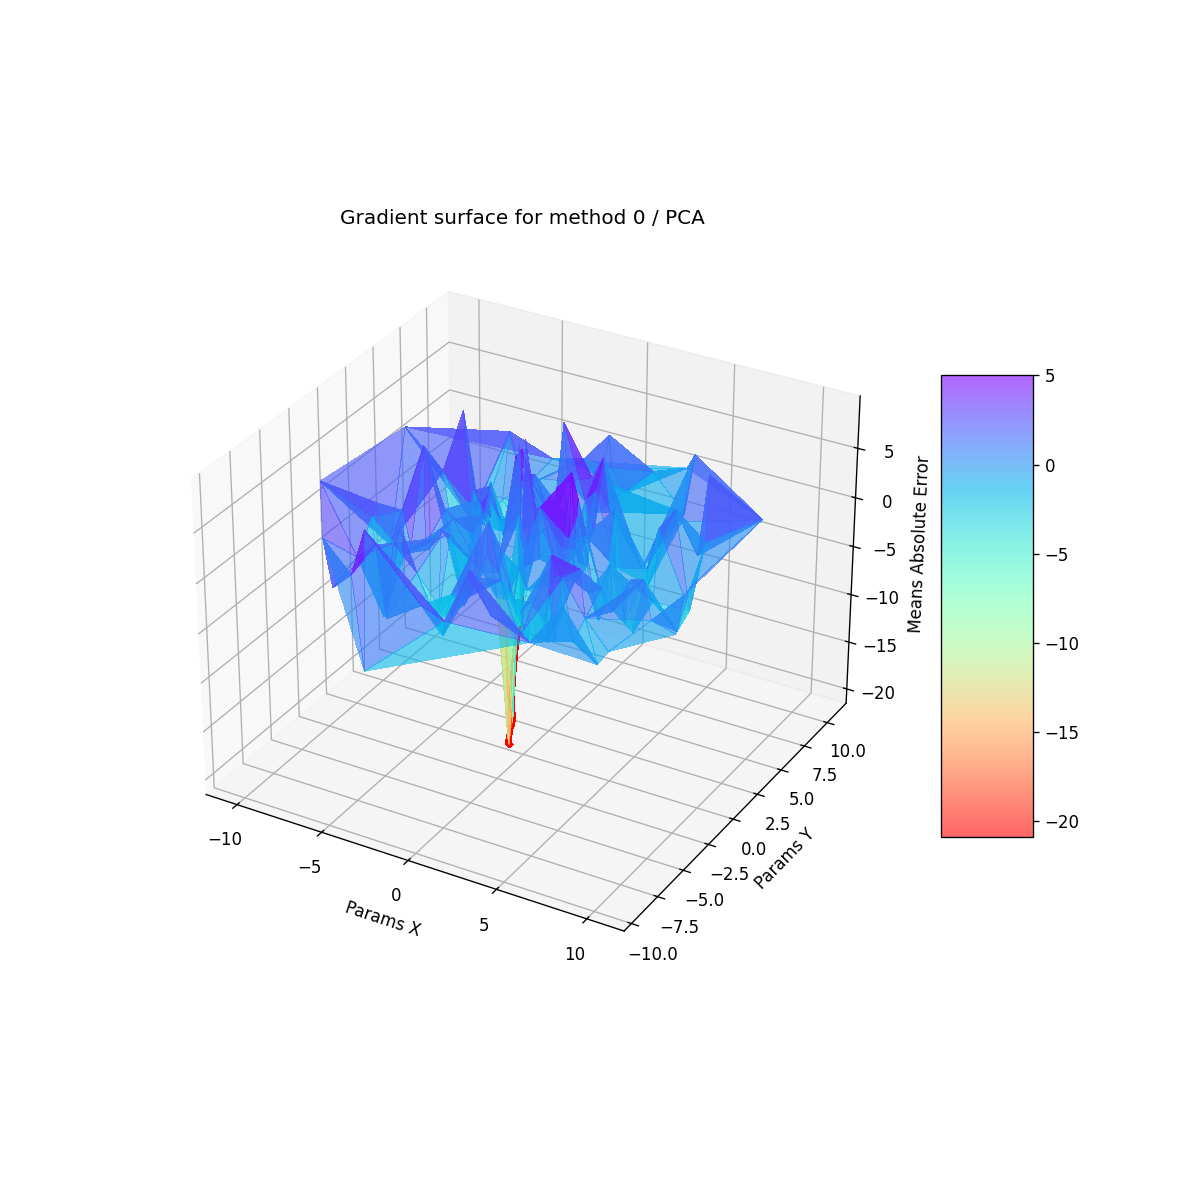

In [14]:
%matplotlib widget
plotSurface(surface0, path=path0, title='Gradient surface for method 0 / PCA', dpi=120, save=f'{CHARTS_PATH}/m0.png', pc_max=5, pcs=(1,2))

In [ ]:
%matplotlib widget
plotSurface(surface1, path=path1, title='Gradient surface for method 1 / PCA', dpi=120, save=f'{CHARTS_PATH}/m1.png')

In [ ]:
%matplotlib widget
plotSurface(surface2, path=path2, title='Gradient surface for method 2 / PCA', dpi=120, save=f'{CHARTS_PATH}/m2.png')

In [ ]:
%matplotlib widget
plotSurface(surface3, path=path3, title='Gradient surface for method 3 / PCA', dpi=120, save=f'{CHARTS_PATH}/m3.png', pc_max=10, pcs=(1, 3))

In [20]:
!pip list | grep -e qiskit -e torch

qiskit                        1.0.2
qiskit-aer-gpu                0.14.1
qiskit-algorithms             0.3.0
qiskit-finance                0.4.1
qiskit-machine-learning       0.7.2
qiskit-nature                 0.7.2
qiskit-optimization           0.6.1
qiskit-qasm3-import           0.4.2
torch                         2.3.0
torchaudio                    2.3.0
torchsummary                  1.5.1
torchvision                   0.18.0
